# Weather Analysis and Its Impact on Traffic Accidents in California

## Introduction

Weather conditions can significantly influence driving safety, affecting visibility, road surface conditions, and vehicle handling. Understanding the relationship between weather variables and traffic accidents is crucial for developing better traffic management strategies and enhancing road safety.

In this Jupyter Notebook, we will conduct a comprehensive weather analysis to investigate the impact of various meteorological factors on traffic accidents within California. This analysis will draw on the US accidents dataset, which includes detailed information about each accident event, along with corresponding weather conditions.

The following weather-related variables will be analyzed to uncover their potential correlations and impacts on traffic accidents:

- `Temperature(F)`: Ambient air temperature at the time of the accident.
- `Wind_Chill(F)`: Wind chill factor, which could influence driver perception and vehicle performance.
- `Humidity(%)`: Relative humidity, which may affect road conditions.
- `Pressure(in)`: Barometric pressure, related to weather patterns.
- `Visibility(mi)`: How far a driver can see, which directly impacts driving safety.
- `Wind_Speed(mph)`: Speed of the wind, which can affect vehicle stability.
- `Precipitation(in)`: Amount of precipitation, influencing road slickness and visibility.

In [3]:
import pandas as pd
excel_path = 'accident1.xlsb'
columns_to_load = [
    'Severity', 'Start_Time', 'End_Time', 'State_Abbrv', 
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
    'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 
    'Precipitation(in)', 'Weather_Condition', 'Start_Lattitude', 
    'Start_Longitude', 'End_Lattitude','End_Longitude'
]

# Load only the selected columns from the Excel file
data = pd.read_excel(excel_path, usecols=columns_to_load)
# Display unique values from the 'Weather_Condition' column across the entire dataset
unique_weather_conditions_all = data['Weather_Condition'].unique()

unique_weather_conditions_all.tolist()  # Convert to list for easier viewing in the output

# Filtering function 
def filter_by_state(df, state_abbr):
    """ Filter the dataframe for the given state abbreviation """
    return df[df['State_Abbrv'] == state_abbr]

# Filter for South Carolina data to test
ca_data = filter_by_state(data, 'SC')

# Show the first few rows of the filtered data
ca_data.head()

,Severity,Start_Time,End_Time,Start_Lattitude,Start_Longitude,End_Lattitude,End_Longitude,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,State_Abbrv
8,1,2022-09-08 06:10:34,2022-09-08 06:40:17,33.771770,-79.719116,33.771770,-79.719116,70.0,70.0,100.0,29.75,10.0,CALM,0.0,0.0,Cloudy,SC
9,1,2022-09-08 06:10:07,2022-09-08 06:39:51,33.863682,-81.238472,33.863682,-81.238472,70.0,70.0,97.0,29.57,10.0,CALM,0.0,0.0,Fair,SC
10,1,2022-09-08 06:30:03,2022-09-08 07:29:44,34.133850,-80.744522,34.133850,-80.744522,70.0,70.0,100.0,29.52,10.0,NNE,8.0,0.0,Mostly Cloudy,SC
35,1,2022-09-08 05:52:24,2022-09-08 06:22:11,33.801682,-79.143051,33.801682,-79.143051,70.0,70.0,100.0,29.77,10.0,CALM,0.0,0.0,Cloudy,SC
36,1,2022-09-08 06:24:54,2022-09-08 06:54:40,34.025124,-78.798973,34.025124,-78.798973,71.0,71.0,96.0,29.72,10.0,NNE,3.0,0.0,Partly Cloudy,SC


## Data Standardization and Correlation Analysis

In the next section of our analysis, we focus on understanding the relationships between various numerical factors that could influence traffic accident severity. To achieve this, we employ data standardization and correlation analysis techniques.

Data standardization is a crucial step in our analysis, especially when dealing with variables that have different units and scales. By standardizing the data, we transform our numerical variables to have a mean of zero and a standard deviation of one. This process makes it easier to compare the impact of different variables on accident severity, as they are all on the same scale.

By analyzing this correlation matrix, we aim to uncover insights into how different environmental and traffic conditions relate to the severity of accidents. This understanding is crucial for developing strategies to mitigate accident severity and improve road safety.

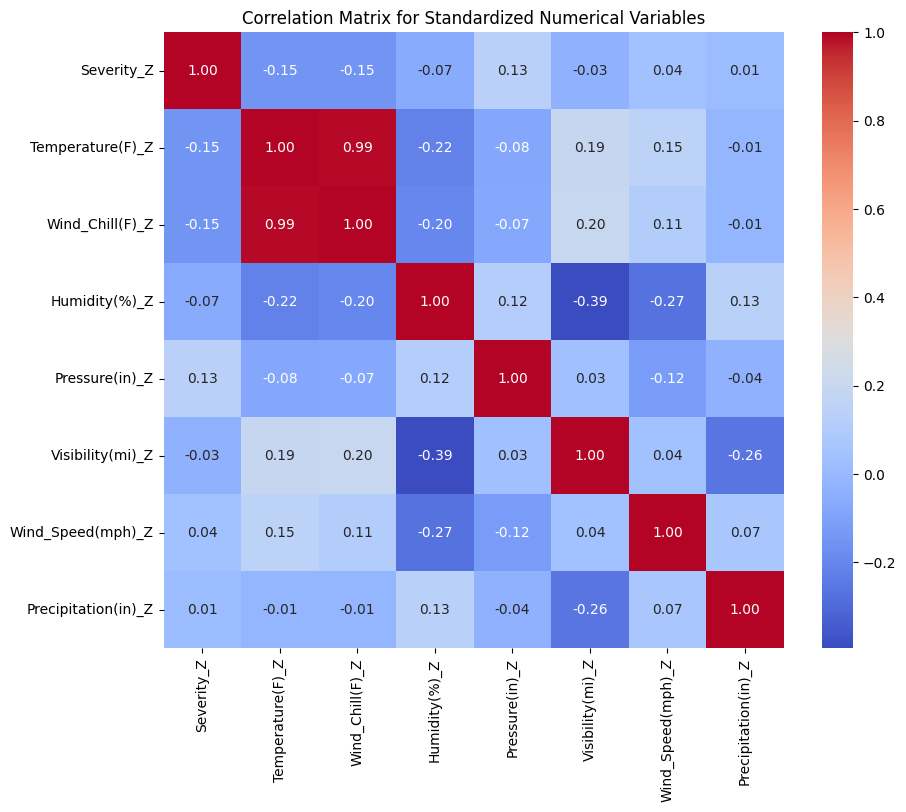

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'ca_data' is your DataFrame after loading and filtering.

# Select only the numerical columns for standardization and correlation matrix
numerical_columns = [
    'Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
    'Precipitation(in)'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
ca_data_standardized = scaler.fit_transform(ca_data[numerical_columns])

# Convert the standardized values back into a DataFrame
ca_data_standardized_df = pd.DataFrame(ca_data_standardized, columns=[f'{col}_Z' for col in numerical_columns])

# Compute the correlation matrix for the standardized columns
correlation_matrix = ca_data_standardized_df.corr()

# Use seaborn to make a heatmap visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Standardized Numerical Variables")
plt.show()


## Insights 

The correlation matrix indicates that the severity of traffic accidents has very low correlation with the environmental and weather-related variables included in the analysis. The values close to zero suggest that there isn't a strong linear relationship between the severity of accidents and factors such as temperature, wind chill, humidity, pressure, visibility, wind speed, and precipitation in the dataset.

This lack of strong correlation suggests that accident severity is likely influenced by other factors not captured in this dataset, such as road conditions, driver behavior, vehicle types, or other non-environmental factors.

## Analyzing Weekly Accident Trends by Weather Conditions

This code segment prepares the dataset for a weekly trend analysis of traffic accidents, categorizing them by weather conditions. It converts accident timestamps into weekdays, groups the data by these days and by whether the weather was 'Normal' or 'Extreme/Different', and then visualizes the trends with a line plot. The aim is to identify patterns in accident frequency across different days of the week and under varying weather conditions.

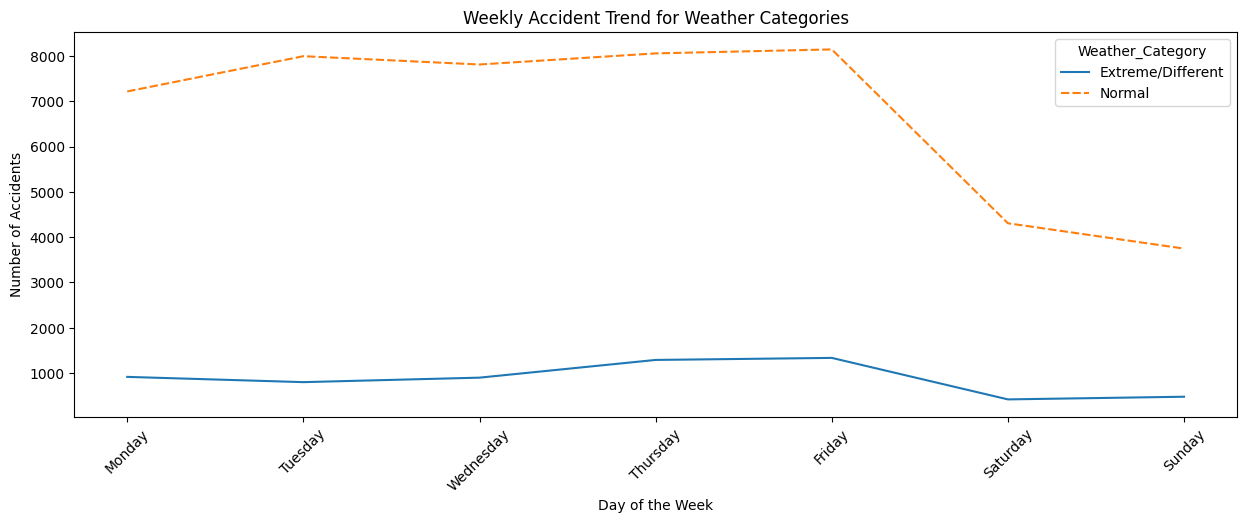

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ca_data is your dataframe and it's already loaded

# Convert 'Start_Time' to datetime and avoid SettingWithCopyWarning
ca_data.loc[:, 'Start_Time'] = pd.to_datetime(ca_data['Start_Time'])

# Extract the day of the week (Monday=0, Sunday=6)
# Avoid SettingWithCopyWarning
ca_data.loc[:, 'DayOfWeek'] = ca_data['Start_Time'].dt.dayofweek

# Map the day numbers to day names
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
        4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
ca_data.loc[:, 'DayOfWeek'] = ca_data['DayOfWeek'].map(days)

# Define normal weather conditions
normal_conditions = ['Fair', 'Cloudy', 'Mostly Cloudy', 'Partly Cloudy']

# Categorize weather conditions and avoid SettingWithCopyWarning
ca_data.loc[:, 'Weather_Category'] = ca_data['Weather_Condition'].apply(lambda x: 'Normal' if x in normal_conditions else 'Extreme/Different')

# Group by day of the week and Weather Category
weekly_data = ca_data.groupby(['DayOfWeek', 'Weather_Category']).size().unstack()

# Reorder the index to have the days in order
weekly_data = weekly_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the data
plt.figure(figsize=(15, 5))
plt.title('Weekly Accident Trend for Weather Categories')
sns.lineplot(data=weekly_data)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()





## Insight from the Graph:

The graph presents the number of accidents across different days of the week, split into two categories of weather conditions: 'Normal' and 'Extreme/Different'. Contrary to initial expectations, the 'Normal' weather condition (represented by the orange line) is associated with a significantly higher number of accidents compared to the 'Extreme/Different' weather condition (depicted by the blue line). The trend for 'Normal' weather shows a consistent pattern with a peak around the mid-week, maintaining a high level through Friday, and then a noticeable drop during the weekend. In contrast, the 'Extreme/Different' weather condition exhibits a relatively flat line, indicating a consistent, low number of accidents throughout the week.
This pattern could suggest that 'Normal' weather conditions do not deter the usual volume of traffic which, combined with other factors like increased traffic flow or driver complacency, could lead to a higher frequency of accidents. On the other hand, 'Extreme/Different' weather conditions might lead to more cautious driving or less traffic on roads, resulting in fewer accidents

#  Conclusion :

Throughout this analytical notebook, we've delved into the patterns and correlations within traffic accident data in the United States, focusing particularly on South Carolina. Our correlation analysis revealed that the severity of accidents has a very low linear correlation with various environmental factors such as temperature, wind chill, humidity, pressure, visibility, wind speed, and precipitation. This suggests that accident severity may be influenced more by other unexamined factors, perhaps related to human behavior, vehicle safety features, road conditions, or legal and cultural traffic practices.

In our weekly trend analysis, we uncovered an intriguing and counterintuitive pattern: despite the general belief that extreme weather conditions exacerbate the risk of accidents, it was the 'Normal' weather conditions that were associated with a higher number of accidents. This could indicate that during normal weather, the unchanged volume of traffic and potentially less cautious driving behavior may increase the risk of accidents.

These findings emphasize the complex interplay of factors affecting traffic safety and challenge some of the common assumptions about weather conditions as a primary factor in accident rates. The insights from this notebook highlight the need for a multifaceted approach to traffic safety analysis, one that includes a variety of data points beyond the scope of weather and environmental conditions. Future research could expand on these findings by integrating additional data on traffic flow, road quality, driver demographics, and enforcement of traffic laws to build comprehensive models for accident prediction and prevention.